Course "50 scikit-learn tips" by **Kenvin Markham**

Link: https://courses.dataschool.io/courses/scikit-learn-tips/801794-introduction/2376425-welcome-to-the-course

* Updated by Tien LE
* Updated date: 2021-10-01


In [1]:
import os
import sys
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sklearn.__version__

'1.0.1'

In [3]:
# Upgrade scikit-learn to 1.0
# ! pip install --upgrade scikit-learn

# Data Settings

In [4]:
file_input_path = "titanic_train.csv"
if not os.path.exists(file_input_path):
    df_train = pd.read_csv("http://bit.ly/kaggletrain")
    df_train.to_csv(file_input_path, header=True, index=False, sep="\t")
else:
    df_train = pd.read_csv(file_input_path, header=0, sep="\t")
    
features = ["Pclass", "Fare"]
X, y = df_train[features], df_train["Survived"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [5]:
file_input_path = "titanic_test.csv"
if not os.path.exists(file_input_path):
    df_test = pd.read_csv("http://bit.ly/kaggletest")
    df_test.to_csv(file_input_path, header=True, index=False, sep="\t")
else:
    df_test = pd.read_csv(file_input_path, header=0, sep="\t")

# Data Preprocessing

## Use ColumnTransformer to apply different preprocessing to different columns

Use ColumnTransformer to apply different preprocessing to different columns:
+ select from DataFrame columns by name
+ passthrough or drop unspecified columns

Requires scikit-learn 0.20+

Additional links: [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html), [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html), [make_column_transformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html?highlight=make_column_transformer)

In [6]:
file_input_path = "titanic_train.csv"
if not os.path.exists(file_input_path):
    df = pd.read_csv("http://bit.ly/kaggletrain")
    df.to_csv(file_input_path, header=True, index=False, sep="\t")
else:
    df = pd.read_csv(file_input_path, header=0, sep="\t")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [9]:
cols = ["Fare", "Embarked", "Sex", "Age"]
X = df[cols]
X = X.head(6)
X

,Fare,Embarked,Sex,Age
0,7.2500,S,male,22.0
1,71.2833,C,female,38.0
2,7.9250,S,female,26.0
3,53.1000,S,female,35.0
4,8.0500,S,male,35.0
5,8.4583,Q,male,NaN


In [10]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer

In [11]:
ohe = OneHotEncoder()
simple_imputer = SimpleImputer()  # get mean value

In [12]:
col_transformer = make_column_transformer(
    (ohe, ["Embarked", "Sex"]),
    (simple_imputer, ["Age"]),
    remainder="passthrough"
)

#https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html?highlight=make_column_transformer
#remainder{‘drop’, ‘passthrough’} or estimator, default=’drop’
#   By default, only the specified columns in transformers are transformed and combined in the output, and the non-specified columns are dropped. (default of 'drop'). By specifying remainder='passthrough', all remaining columns that were not specified in transformers will be automatically passed through. This subset of columns is concatenated with the output of the transformers. By setting remainder to be an estimator, the remaining non-specified columns will use the remainder estimator. The estimator must support fit and transform.

In [13]:
col_transformer.fit_transform(X)

array([[ 0.    ,  0.    ,  1.    ,  0.    ,  1.    , 22.    ,  7.25  ],
       [ 1.    ,  0.    ,  0.    ,  1.    ,  0.    , 38.    , 71.2833],
       [ 0.    ,  0.    ,  1.    ,  1.    ,  0.    , 26.    ,  7.925 ],
       [ 0.    ,  0.    ,  1.    ,  1.    ,  0.    , 35.    , 53.1   ],
       [ 0.    ,  0.    ,  1.    ,  0.    ,  1.    , 35.    ,  8.05  ],
       [ 0.    ,  1.    ,  0.    ,  0.    ,  1.    , 31.2   ,  8.4583]])

## Seven ways to select columns using ColumnTransformer

There are SEVEN ways to select columns using [ColumnTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html):
+ column name
+ integer position
+ slice
+ boolean mask
+ regex pattern
+ dtypes to include
+ dtypes to exclude

Additional links: [make_column_selector](https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_selector.html)

In [14]:
import os 

file_input_path = "titanic_train.csv"
if not os.path.exists(file_input_path):
    df = pd.read_csv("http://bit.ly/kaggletrain")
    df.to_csv(file_input_path, header=True, index=False, sep="\t")
else:
    df = pd.read_csv(file_input_path, header=0, sep="\t")

In [15]:
cols = ["Fare", "Embarked", "Sex", "Age"]
X = df[cols]
X = X.head(6)
X

,Fare,Embarked,Sex,Age
0,7.2500,S,male,22.0
1,71.2833,C,female,38.0
2,7.9250,S,female,26.0
3,53.1000,S,female,35.0
4,8.0500,S,male,35.0
5,8.4583,Q,male,NaN


In [16]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector

In [17]:
ohe = OneHotEncoder()

In [18]:
X.columns

Index(['Fare', 'Embarked', 'Sex', 'Age'], dtype='object')

In [19]:
# all SEVEN of these produce the same results
# Note that: reminder = "drop" (by default)

# column name
col_transformer = make_column_transformer((ohe, ['Embarked', 'Sex']))

# integer position
col_transformer = make_column_transformer((ohe, [1,2]))  # column index 0,1,2,...

# slice
col_transformer = make_column_transformer((ohe, slice(1,3)))  # column from index 1 to k-1

# boolean mask
col_transformer = make_column_transformer((ohe, [False, True, True, False]))

# regex pattern
col_transformer = make_column_transformer((ohe, make_column_selector(pattern="E|S")))  # startwiths E or S
# https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_selector.html
# patternstr, default=None
#   Name of columns containing this regex pattern will be included. If None, column selection will not be selected based on pattern.

# dtypes to include
col_transformer = make_column_transformer((ohe, make_column_selector(dtype_include=object)))

# dtypes to exclude
col_transformer = make_column_transformer((ohe, make_column_selector(dtype_exclude=np.number)))

In [20]:
col_transformer.fit_transform(X)

array([[0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [0., 0., 1., 1., 0.],
       [0., 0., 1., 0., 1.],
       [0., 1., 0., 0., 1.]])

### Simple Case

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html?highlight=standardscaler#sklearn.preprocessing.StandardScaler

Standardize features by removing the mean and scaling to unit variance.

In [21]:
X

,Fare,Embarked,Sex,Age
0,7.2500,S,male,22.0
1,71.2833,C,female,38.0
2,7.9250,S,female,26.0
3,53.1000,S,female,35.0
4,8.0500,S,male,35.0
5,8.4583,Q,male,NaN


In [22]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder

col_transformer = make_column_transformer(
    (StandardScaler(), make_column_selector(dtype_include=np.number)),  
    (OneHotEncoder(), make_column_selector(dtype_include=object))
)

col_transformer.fit_transform(X)

array([[-0.71829711, -1.50516598,  0.        ,  0.        ,  1.        ,
         0.        ,  1.        ],
       [ 1.7333147 ,  1.11251398,  1.        ,  0.        ,  0.        ,
         1.        ,  0.        ],
       [-0.69245371, -0.85074599,  0.        ,  0.        ,  1.        ,
         1.        ,  0.        ],
       [ 1.03713954,  0.62169899,  0.        ,  0.        ,  1.        ,
         1.        ,  0.        ],
       [-0.6876679 ,  0.62169899,  0.        ,  0.        ,  1.        ,
         0.        ,  1.        ],
       [-0.67203551,         nan,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ]])

### Flexible Case

Link: https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html#sphx-glr-auto-examples-compose-plot-column-transformer-mixed-types-py

In [23]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

numeric_features = ["Fare", "Age"]
numeric_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ]
)

categorical_features = ["Embarked", "Sex"]
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("numeric", numeric_transformer, numeric_features),
        ("categorical", categorical_transformer, categorical_features)
    ]
)

preprocessor.fit_transform(X)

array([[-0.71829711, -1.70817275,  0.        ,  0.        ,  1.        ,
         0.        ,  1.        ],
       [ 1.7333147 ,  1.07122698,  1.        ,  0.        ,  0.        ,
         1.        ,  0.        ],
       [-0.69245371, -1.01332282,  0.        ,  0.        ,  1.        ,
         1.        ,  0.        ],
       [ 1.03713954,  0.55008953,  0.        ,  0.        ,  1.        ,
         1.        ,  0.        ],
       [-0.6876679 ,  0.55008953,  0.        ,  0.        ,  1.        ,
         0.        ,  1.        ],
       [-0.67203551,  0.55008953,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ]])

## What is the difference between "fit" and "transform"?

Q: What is the difference between the "fit" and "transform" methods?

+ "[fit](https://scikit-learn.org/stable/glossary.html#term-fit)": transformer learns something about the data
+ "[transform](https://scikit-learn.org/stable/glossary.html#term-transform)": it uses what it learned to do the data transformation

For examples
+ CountVectorizer
    - fit: learns the vocabulary
    - transform: creates a document-term matrix using the vocabulary
    
+ SimpleImputer
    - fit: learns the value to impute
    - transform: fills in missing entries using the imputation value
    
+ StandardScaler
    - fit: learns the mean and scale of each feature
    - transform: standardizes the features using the mean and scale
    
+ HashingVectorizer
    - fit: is not used, and thus it is known as a "stateless" transformer
    - transform: create the document-term matrix using a hash of the token

## Use "fit_transform" on training data, but "transform" (only) on testing/new data

Use "[fit_transform](https://scikit-learn.org/stable/glossary.html#term-fit_transform)" on training data, but "[transform](https://scikit-learn.org/stable/glossary.html#term-transform)" (only) on testing/new data.

Applies the same transformations to both sets of data, which creates consistent columns and prevents [data leakage](https://scikit-learn.org/stable/common_pitfalls.html#data-leakage)!

## Get the feature names output by a ColumnTransformer

Need to get the feature names output by a [ColumnTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html)?

Use get_feature_names(), which now works with "passthrough" columns (new in version 0.23)!

Note: Beginning in scikit-learn 1.0, the get_feature_names method has been deprecated in favor of [get_feature_names_out](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html#sklearn.compose.ColumnTransformer.get_feature_names_out).


In [24]:
X

,Fare,Embarked,Sex,Age
0,7.2500,S,male,22.0
1,71.2833,C,female,38.0
2,7.9250,S,female,26.0
3,53.1000,S,female,35.0
4,8.0500,S,male,35.0
5,8.4583,Q,male,NaN


In [25]:
X.columns

Index(['Fare', 'Embarked', 'Sex', 'Age'], dtype='object')

In [26]:
col_transformer = make_column_transformer(
    (OneHotEncoder(), ["Embarked", "Sex"]),
    remainder="passthrough"
)

In [27]:
ft = col_transformer.fit_transform(X)
ft

array([[ 0.    ,  0.    ,  1.    ,  0.    ,  1.    ,  7.25  , 22.    ],
       [ 1.    ,  0.    ,  0.    ,  1.    ,  0.    , 71.2833, 38.    ],
       [ 0.    ,  0.    ,  1.    ,  1.    ,  0.    ,  7.925 , 26.    ],
       [ 0.    ,  0.    ,  1.    ,  1.    ,  0.    , 53.1   , 35.    ],
       [ 0.    ,  0.    ,  1.    ,  0.    ,  1.    ,  8.05  , 35.    ],
       [ 0.    ,  1.    ,  0.    ,  0.    ,  1.    ,  8.4583,     nan]])

In [28]:
ft.shape

(6, 7)

In [29]:
col_transformer.get_feature_names()

C:\Users\TienLE\anaconda3\envs\py39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['onehotencoder__x0_C',
 'onehotencoder__x0_Q',
 'onehotencoder__x0_S',
 'onehotencoder__x1_female',
 'onehotencoder__x1_male',
 'Fare',
 'Age']

## Passthrough some columns and drop others in a ColumnTransformer

In a [ColumnTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html), you can use the strings 'passthrough' and 'drop' in place of a transformer. 

Useful if you need to passthrough some columns and drop others!

In [30]:
X

,Fare,Embarked,Sex,Age
0,7.2500,S,male,22.0
1,71.2833,C,female,38.0
2,7.9250,S,female,26.0
3,53.1000,S,female,35.0
4,8.0500,S,male,35.0
5,8.4583,Q,male,NaN


### Method 1: "passthrough" with some columns

In [31]:
col_transformer = make_column_transformer(
    (SimpleImputer(), ["Age"]),
    ("passthrough", ["Fare"]),
    remainder="drop"
)
col_transformer.fit_transform(X)

array([[22.    ,  7.25  ],
       [38.    , 71.2833],
       [26.    ,  7.925 ],
       [35.    , 53.1   ],
       [35.    ,  8.05  ],
       [31.2   ,  8.4583]])

### Method 2: "drop" with some columns

In [32]:
col_transformer = make_column_transformer(
    (SimpleImputer(), ["Age"]),
    ("drop", ["Embarked", "Sex"]),
    remainder="passthrough"
)

col_transformer.fit_transform(X)

array([[22.    ,  7.25  ],
       [38.    , 71.2833],
       [26.    ,  7.925 ],
       [35.    , 53.1   ],
       [35.    ,  8.05  ],
       [31.2   ,  8.4583]])

## (Detail ?) Four reasons to use scikit-learn (not pandas) for ML preprocessing

Reasons to use scikit-learn (not pandas) for ML [preprocessing](https://scikit-learn.org/stable/modules/preprocessing.html):
+ You can cross-validate the entire workflow
+ You can [grid search](https://scikit-learn.org/stable/modules/grid_search.html) model & preprocessing hyperparameters
+ Avoids adding new columns to the source DataFrame
+ pandas lacks separate fit/transform steps to prevent [data leakage](https://scikit-learn.org/stable/common_pitfalls.html#data-leakage)

## Don't use .values when passing a pandas object to scikit-learn

There's no need to use ".values" when passing a DataFrame or Series to scikit-learn... it knows how to access the underlying NumPy array!


In [33]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
clf = LogisticRegression()

In [36]:
X = df[["Pclass", "Fare"]]
y = df["Survived"]

In [37]:
type(X)

pandas.core.frame.DataFrame

In [38]:
type(y)

pandas.core.series.Series

In [39]:
clf.fit(X, y)

LogisticRegression()

## Load a toy dataset into a DataFrame

New in version 0.23: Need to load a [toy dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html) into a DataFrame, including column names? Set as_frame=True.

Want features and target as separate objects? Also set return_X_y=True.

Additional links: [load_iris](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html)

In [40]:
from sklearn.datasets import load_iris

### Return DataFrame with features and target

In [41]:
df_toy = load_iris(as_frame=True)

In [42]:
type(df_toy)

sklearn.utils.Bunch

In [43]:
print(dir(df_toy))

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [44]:
df_toy_frame = df_toy["frame"]

In [45]:
df_toy_frame.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


### Return Feature DataFrame and Target Series 

In [46]:
X_toy, y_toy = load_iris(as_frame=True, return_X_y=True)

In [47]:
X_toy.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [48]:
y_toy.head(3)

0    0
1    0
2    0
Name: target, dtype: int32

# Categorical Features

## Encode categorical features using OneHotEncoder or OrdinalEncoder

Two common ways to encode categorical features:
+ [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) for unordered (nominal) data
+ [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html) for ordered (ordinal) data

P.S. [LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html) is for labels, not features!

In [49]:
# "Shape" is unordered, "Class" and "Size" are ordered
X = pd.DataFrame({'Shape':['square', 'square', 'oval', 'circle'],
                  'Class': ['third', 'first', 'second', 'third'],
                  'Size': ['S', 'S', 'L', 'XL']})

In [50]:
X

,Shape,Class,Size
0,square,third,S
1,square,first,S
2,oval,second,L
3,circle,third,XL


In [51]:
X["Shape"].shape

(4,)

In [52]:
X[["Shape"]].shape

(4, 1)

### left-to-right column order is alphabetical (circle, oval, square)

In [53]:
ohe = OneHotEncoder(sparse=False)
ohe.fit_transform(X[["Shape"]])

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [54]:
ohe.categories_

[array(['circle', 'oval', 'square'], dtype=object)]

### category ordering (within each feature) 

In [55]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder(categories=[
    ["first", "second", "third"],  # order of Class
    ["S", "M", "L", "XL"]          # order of Size  
])

oe.fit_transform(X[["Class", "Size"]])

array([[2., 0.],
       [0., 0.],
       [1., 2.],
       [2., 3.]])

In [56]:
oe.categories_

[array(['first', 'second', 'third'], dtype=object),
 array(['S', 'M', 'L', 'XL'], dtype=object)]

## Handle unknown categories with OneHotEncoder by encoding them as zeros

Q: For a [one-hot encoded feature](https://scikit-learn.org/stable/modules/preprocessing.html#encoding-categorical-features), what can you do if new data contains categories that weren't seen during training?

A: Set handle_unknown='ignore' to encode new categories as all zeros.

P.S. If you know all possible categories that might ever appear, you can instead specify the categories manually. handle_unknown='ignore' is useful specifically when you don't know all possible categories.

In [57]:
X = pd.DataFrame({'col':['A', 'B', 'C', 'B']})
X_new = pd.DataFrame({'col':['A', 'C', 'D']})

In [58]:
ohe = OneHotEncoder(sparse=False, handle_unknown="ignore")
#sparse : bool, default=True
#    Will return sparse matrix if set True else will return an array.

#handle_unknown : {'error', 'ignore'}, default='error'
#    Whether to raise an error or ignore if an unknown categorical feature
#    is present during transform (default is to raise). When this parameter
#    is set to 'ignore' and an unknown category is encountered during
#    transform, the resulting one-hot encoded columns for this feature
#    will be all zeros. In the inverse transform, an unknown category
#    will be denoted as None.


In [59]:
X

,col
0,A
1,B
2,C
3,B


In [60]:
X_new

,col
0,A
1,C
2,D


In [61]:
# three columns represent categories A, B, and C
ohe.fit_transform(X[["col"]])

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

In [62]:
# category D was not learned by OneHotEncoder during the "fit" step
# category D is encoded as all zeros
ohe.transform(X_new)

array([[1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 0.]])

## Three reasons not to use drop='first' with OneHotEncoder

In most cases, I recommend that you don't use drop='first' with OneHotEncoder. Here's why:

+ Multicollinearity is rarely an issue with scikit-learn models
+ drop='first' is incompatible with handle_unknown='ignore'
+ May be problematic if you standardize all features or use a regularized model


Note: Beginning in scikit-learn 1.0, drop='first' and handle_unknown='ignore' can be used together. However, the dropped category and an unknown category will both be encoded as all zeros. 

## Drop the first category from binary features (only) with OneHotEncoder

New in version 0.23: Use drop='if_binary' with OneHotEncoder to drop the first category ONLY if it's a binary feature (meaning it has exactly two categories).

Note: Beginning in scikit-learn 1.0, drop='first' and drop='if_binary' can both be used with handle_unknown='ignore'. However, the dropped category and an unknown category will both be encoded as all zeros.

In [63]:
X = pd.DataFrame({'Shape':['circle', 'oval', 'square', 'square'],
                  'Color': ['pink', 'yellow', 'pink', 'yellow']})

In [64]:
# Shape has 3 categories, Color has 2 categories
X

,Shape,Color
0,circle,pink
1,oval,yellow
2,square,pink
3,square,yellow


In [65]:
# drop=None (default) creates one feature column per category
ohe = OneHotEncoder(sparse=False, drop=None)
ohe.fit_transform(X)

array([[1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [0., 0., 1., 0., 1.]])

In [66]:
# drop='if_binary' drops the first category of binary features
ohe = OneHotEncoder(sparse=False, drop="if_binary")
ohe.fit_transform(X)

array([[1., 0., 0., 0.],
       [0., 1., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 1.]])

## Use OrdinalEncoder instead of OneHotEncoder with tree-based models

With a [tree-based model](https://scikit-learn.org/stable/modules/tree.html), try [OrdinalEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html) instead of [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) even for nominal (unordered) features.

Accuracy will often be similar, but OrdinalEncoder will be much faster!

Additional links: [Random Forests](https://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees)

In [67]:
file_input_path = "adult-census.csv"
if not os.path.exists(file_input_path):
    df = pd.read_csv('https://www.openml.org/data/get_csv/1595261/adult-census.csv')
    df.to_csv(file_input_path, header=True, index=False, sep="\t")
else:
    df = pd.read_csv(file_input_path, header=0, sep="\t")

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48842 non-null  object
 14  class           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [69]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [70]:
df.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K


In [71]:
categorical_cols = ['workclass', 'education', 'marital-status',
                    'occupation', 'relationship', 'race', 'sex']

In [72]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [73]:
X = df[categorical_cols]
y = df["class"]

In [74]:
X.columns

Index(['workclass', 'education', 'marital-status', 'occupation',
       'relationship', 'race', 'sex'],
      dtype='object')

In [75]:
X.head(2)

,workclass,education,marital-status,occupation,relationship,race,sex
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male


In [76]:
y.head(2)

0     <=50K
1     <=50K
Name: class, dtype: object

### Comparasion between OneHotEncoder and OrdinalEncoder

In [77]:
print(f"Number of columns in X: {len(X.columns)}")

Number of columns in X: 7


In [78]:
ohe = OneHotEncoder(sparse=False)
ohe.fit_transform(X).shape

(48842, 60)

In [79]:
ohe.fit_transform(X)

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 1., ..., 1., 0., 1.],
       ...,
       [0., 0., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 0., 1.],
       [0., 0., 0., ..., 1., 1., 0.]])

In [80]:
oe = OrdinalEncoder()
oe.fit_transform(X).shape

(48842, 7)

In [81]:
oe.fit_transform(X)

array([[ 4.,  1.,  4., ...,  3.,  2.,  1.],
       [ 4., 11.,  2., ...,  0.,  4.,  1.],
       [ 2.,  7.,  2., ...,  0.,  4.,  1.],
       ...,
       [ 4., 11.,  6., ...,  4.,  4.,  0.],
       [ 4., 11.,  4., ...,  3.,  4.,  1.],
       [ 5., 11.,  2., ...,  5.,  4.,  0.]])

### Classifier

In [82]:
rf = RandomForestClassifier(random_state=1, n_jobs=-1)

In [83]:
# Pipeline containing OneHotEncoder
ohe_pipe = make_pipeline(
    ohe,
    rf
)
%time cross_val_score(ohe_pipe, X, y).mean()

Wall time: 10.7 s


0.8262561170407418

In [84]:
# Pipeline containing OrdinalEncoder
oe_pipe = make_pipeline(
    oe,
    rf
)
%time cross_val_score(oe_pipe, X, y).mean()

Wall time: 4.58 s


0.8256623624061437

# Missing values

## Add a missing indicator to encode "missingness" as a feature

When [imputing missing values](https://scikit-learn.org/stable/modules/impute.html), you can preserve info about which values were missing and use THAT as a feature!

Why? Sometimes there's a relationship between "missingness" and the target/label you are trying to predict.

In [85]:
X = pd.DataFrame({'Age':[20, 30, 10, np.nan, 10]})

In [86]:
from sklearn.impute import SimpleImputer

In [87]:
# impute the mean
imputer = SimpleImputer()
imputer.fit_transform(X)

array([[20. ],
       [30. ],
       [10. ],
       [17.5],
       [10. ]])

In [88]:
# add an indicator
imputer = SimpleImputer(add_indicator=True)
imputer.fit_transform(X)

array([[20. ,  0. ],
       [30. ,  0. ],
       [10. ,  0. ],
       [17.5,  1. ],
       [10. ,  0. ]])

## Impute missing values using KNNImputer or IterativeImputer

Need something better than [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) for missing value imputation?

Try [KNNImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html) or [IterativeImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html) (inspired by R's MICE package). Both are multivariate approaches (they take other features into account!)


In [89]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.impute import KNNImputer

In [90]:
import os 

file_input_path = "titanic_train.csv"
if not os.path.exists(file_input_path):
    df = pd.read_csv("http://bit.ly/kaggletrain")
    df.to_csv(file_input_path, header=True, index=False, sep="\t")
else:
    df = pd.read_csv(file_input_path, header=0, sep="\t")

In [91]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [92]:
cols = ['SibSp', 'Fare', 'Age']
X = df[cols][:6]

In [93]:
X

,SibSp,Fare,Age
0,1,7.2500,22.0
1,1,71.2833,38.0
2,0,7.9250,26.0
3,1,53.1000,35.0
4,0,8.0500,35.0
5,0,8.4583,NaN


In [94]:
imputer_it = IterativeImputer()
imputer_it.fit_transform(X)

array([[ 1.        ,  7.25      , 22.        ],
       [ 1.        , 71.2833    , 38.        ],
       [ 0.        ,  7.925     , 26.        ],
       [ 1.        , 53.1       , 35.        ],
       [ 0.        ,  8.05      , 35.        ],
       [ 0.        ,  8.4583    , 28.50639495]])

In [95]:
imputer_knn = KNNImputer(n_neighbors=2)  # default=5
imputer_knn.fit_transform(X)
# Note: (26+35)/2 = 30.5

array([[ 1.    ,  7.25  , 22.    ],
       [ 1.    , 71.2833, 38.    ],
       [ 0.    ,  7.925 , 26.    ],
       [ 1.    , 53.1   , 35.    ],
       [ 0.    ,  8.05  , 35.    ],
       [ 0.    ,  8.4583, 30.5   ]])

## HistGradientBoostingClassifier natively supports missing values

Four options for handling missing values (NaNs):
+ Drop rows containing NaNs
+ Drop columns containing NaNs
+ Fill NaNs with imputed values
+ [Use a model that natively handles NaNs (NEW!)](https://scikit-learn.org/stable/modules/ensemble.html#missing-values-support)

Note: Beginning in scikit-learn 1.0, HistGradientBoostingClassifier and HistGradientBoostingRegressor are considered stable (rather than experimental), and thus you no longer have to enable them explicitly.


In [96]:
import os 

file_input_path = "titanic_train.csv"
if not os.path.exists(file_input_path):
    df_train = pd.read_csv("http://bit.ly/kaggletrain")
    df_train.to_csv(file_input_path, header=True, index=False, sep="\t")
else:
    df_train = pd.read_csv(file_input_path, header=0, sep="\t")

In [97]:
import os 

file_input_path = "titanic_test.csv"
if not os.path.exists(file_input_path):
    df_test = pd.read_csv("http://bit.ly/kaggletest")
    df_test.to_csv(file_input_path, header=True, index=False, sep="\t")
else:
    df_test = pd.read_csv(file_input_path, header=0, sep="\t")

In [98]:
df_test = df_test[:175]

In [99]:
col_train = ['Survived', 'Age', 'Fare', 'Pclass']
col_test = ['Age', 'Fare', 'Pclass']

In [100]:
df_train = df_train[col_train]
df_test = df_test[col_test]

### count the number of NaNs in each column

In [101]:
df_train.isna().sum()

Survived      0
Age         177
Fare          0
Pclass        0
dtype: int64

In [102]:
df_test.isna().sum()

Age       36
Fare       1
Pclass     0
dtype: int64

In [103]:
df_label = df_train.pop("Survived")

In [104]:
type(df_label)

pandas.core.series.Series

In [105]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

C:\Users\TienLE\anaconda3\envs\py39\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [106]:
# no errors, despite NaNs in train and test!
clf = HistGradientBoostingClassifier()
clf.fit(df_train, df_label)

HistGradientBoostingClassifier()

In [107]:
pred = clf.predict(df_test)
pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [108]:
df_test.head()

,Age,Fare,Pclass
0,34.5,7.8292,3
1,47.0,7.0000,3
2,62.0,9.6875,2
3,27.0,8.6625,3
4,22.0,12.2875,3


## Two ways to impute missing values for a categorical feature

Need to [impute missing values](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) for a categorical feature?

Two options:
+ Impute the most frequent value
+ Impute the value "missing", which treats it as a separate category

strategy : str, default='mean'
    The imputation strategy.

    - If "mean", then replace missing values using the mean along
      each column. Can only be used with numeric data.
    - If "median", then replace missing values using the median along
      each column. Can only be used with numeric data.
    - If "most_frequent", then replace missing using the most frequent
      value along each column. Can be used with strings or numeric data.
      If there is more than one such value, only the smallest is returned.
    - If "constant", then replace missing values with fill_value. Can be
      used with strings or numeric data.

    .. versionadded:: 0.20
       strategy="constant" for fixed value imputation.

fill_value : str or numerical value, default=None
    When strategy == "constant", fill_value is used to replace all
    occurrences of missing_values.
    If left to the default, fill_value will be 0 when imputing numerical
    data and "missing_value" for strings or object data types.

In [109]:
X = pd.DataFrame({'Shape':['square', 'square', 'oval', 'circle', np.nan]})

In [110]:
from sklearn.impute import SimpleImputer

In [111]:
imputer = SimpleImputer(strategy="most_frequent")
imputer.fit_transform(X)

array([['square'],
       ['square'],
       ['oval'],
       ['circle'],
       ['square']], dtype=object)

In [112]:
imputer = SimpleImputer(strategy="constant", fill_value="missing")
imputer.fit_transform(X)
# Note: after imputering based on "missing" value, we can use OneHotEncoding to numerize this column.

array([['square'],
       ['square'],
       ['oval'],
       ['circle'],
       ['missing']], dtype=object)

# Pipeline

## Use Pipeline to chain together multiple steps

Q: What does ["pipeline"](https://scikit-learn.org/stable/modules/compose.html#pipeline-chaining-estimators) do?

A: Chains together multiple steps: output of each step is used as input to the next step.

Makes it easy to apply the same [preprocessing](https://scikit-learn.org/stable/modules/preprocessing.html) to train and test!

Additional links: [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html), [data leakage](https://scikit-learn.org/stable/common_pitfalls.html#data-leakage)


In [113]:
train = pd.DataFrame({'feat1':[10, 20, np.nan, 2], 'feat2':[25., 20, 5, 3], 'label':['A', 'A', 'B', 'B']})
test = pd.DataFrame({'feat1':[30., 5, 15], 'feat2':[12, 10, np.nan]})

In [114]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

In [115]:
imputer = SimpleImputer()
clf = LogisticRegression()

In [116]:
# pipeline: impute missing values, then pass the results to the classifier
pipe = make_pipeline(
    imputer,
    clf
)

In [117]:
train

,feat1,feat2,label
0,10.0,25.0,A
1,20.0,20.0,A
2,NaN,5.0,B
3,2.0,3.0,B


In [118]:
test

,feat1,feat2
0,30.0,12.0
1,5.0,10.0
2,15.0,NaN


In [119]:
features, label = train[['feat1', 'feat2']], train["label"]

In [120]:
# Train phase based on pipeline
pipe.fit(features, label)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('logisticregression', LogisticRegression())])

In [121]:
# Predict based on pipeline
pipe.predict(test)

array(['A', 'B', 'A'], dtype=object)

In [122]:
pipe.predict_proba(test)

array([[0.91180344, 0.08819656],
       [0.07269959, 0.92730041],
       [0.61128195, 0.38871805]])

## What is the difference between Pipeline and make_pipeline?

Q: What's the difference between [Pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) and [make_pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html)?

A: Pipeline requires naming of steps, make_pipeline does not.

(Same applies to [ColumnTransformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html) vs [make_column_transformer](https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_transformer.html))

In [123]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

In [124]:
ohe = OneHotEncoder()
imp = SimpleImputer()
clf = LogisticRegression()

### make_column_transformer & make_pipeline

In [125]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [126]:
col_transformer = make_column_transformer(
    (ohe, ["Embarked", "Sex"]),
    (imp, ["Age"]),
    remainder="passthrough"
)

In [127]:
pipe = make_pipeline(col_transformer, clf)

### ColumnTransformer & Pipeline

In [128]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [129]:
col_transformer = ColumnTransformer(
    [
        ("encoder", ohe, ["Embarked", "Sex"]),
        ("imputer", imp, ["Age"])
    ],
    remainder="passthrough"
)

In [130]:
pipe = Pipeline(
    [
        ("preprocessor", col_transformer),
        ("classifier", clf)
    ]
)

## Examine the intermediate steps in a Pipeline

Q: How do you examine the intermediate steps in a Pipeline?

A: By using the "named_steps" attribute:

pipe.named_steps.STEP_NAME.ATTRIBUTE

In [131]:
import os 

file_input_path = "titanic_train.csv"
if not os.path.exists(file_input_path):
    df_train = pd.read_csv("http://bit.ly/kaggletrain")
    df_train.to_csv(file_input_path, header=True, index=False, sep="\t")
else:
    df_train = pd.read_csv(file_input_path, header=0, sep="\t")

In [132]:
df_train = df_train[:6][["Age", "Pclass", "Survived"]]

In [133]:
df_train

,Age,Pclass,Survived
0,22.0,3,0
1,38.0,1,1
2,26.0,3,1
3,35.0,1,1
4,35.0,3,0
5,NaN,3,0


In [134]:
X, y = df_train[["Age", "Pclass"]], df_train["Survived"]

In [135]:
X

,Age,Pclass
0,22.0,3
1,38.0,1
2,26.0,3
3,35.0,1
4,35.0,3
5,NaN,3


In [136]:
y
# if y is a DataFrame, we will see the warning when fitting phase as follows
# .../sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
# y = column_or_1d(y, warn=True)

0    0
1    1
2    1
3    1
4    0
5    0
Name: Survived, dtype: int64

In [137]:
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

In [138]:
pipe = make_pipeline(
    SimpleImputer(),
    LogisticRegression()
)

In [139]:
pipe.fit(X, y)

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('logisticregression', LogisticRegression())])

### Step in pipeline

In [140]:
pipe.named_steps

{'simpleimputer': SimpleImputer(), 'logisticregression': LogisticRegression()}

### Values of imputation and model coefficients

In [141]:
pipe.named_steps.simpleimputer.statistics_

array([31.2       ,  2.33333333])

In [142]:
list(zip(X.columns, pipe.named_steps.simpleimputer.statistics_.tolist()))

[('Age', 31.2), ('Pclass', 2.3333333333333335)]

In [143]:
pipe.named_steps.logisticregression.coef_

array([[ 0.03232238, -0.83741131]])

In [144]:
list(zip(X.columns, pipe.named_steps.logisticregression.coef_[0].tolist()))

[('Age', 0.03232237651702789), ('Pclass', -0.8374113057215837)]

## Use the correct methods for each type of Pipeline

Did you know that there are two types of [Pipelines](https://scikit-learn.org/stable/modules/compose.html#pipeline-chaining-estimators)?

The Pipeline type determines which methods you can use with it, and what those methods actually do.

Additional links: [fit_transform](https://scikit-learn.org/stable/glossary.html#term-fit_transform), [transform](https://scikit-learn.org/stable/glossary.html#term-transform)

### Last step of Pipeline is classifier / regressor --> fit & predict
+ **pipe.fit()** : All steps before the final one run **fit_transform()**, and then trains based on **fit()**
+ **pipe.predict()** : All steps before the final one run **transform()**, and then runs **predict()**

### Last step of Pipeline is a transformer --> fit_transform & transform
+ **pipe.fit_transform()** : All steps run **fit_transorform()**
+ **pipe.transform()** : All steps run **transform()**

## Save a model of Pipeline using joblib

Want to [save a model](https://scikit-learn.org/stable/modules/model_persistence.html) (or pipeline) for later use? Use joblib!

Warning: You must load it into an identical environment, and only load objects you trust 😇

Additional links: [pickle](https://docs.python.org/3/library/pickle.html)

In [145]:
import os 

file_input_path = "titanic_train.csv"
if not os.path.exists(file_input_path):
    df_train = pd.read_csv("http://bit.ly/kaggletrain")
    df_train.to_csv(file_input_path, header=True, index=False, sep="\t")
else:
    df_train = pd.read_csv(file_input_path, header=0, sep="\t")

In [146]:
file_input_path = "titanic_test.csv"
if not os.path.exists(file_input_path):
    df_test = pd.read_csv("http://bit.ly/kaggletest")
    df_test.to_csv(file_input_path, header=True, index=False, sep="\t")
else:
    df_test = pd.read_csv(file_input_path, header=0, sep="\t")

In [147]:
cols = ['Embarked', 'Sex']

In [148]:
X, y = df_train[cols], df_train["Survived"]

In [149]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline

In [150]:
pipe = make_pipeline(
    OneHotEncoder(),
    LogisticRegression(solver="liblinear", random_state=1)
)

In [151]:
pipe.fit(X, y)

Pipeline(steps=[('onehotencoder', OneHotEncoder()),
                ('logisticregression',
                 LogisticRegression(random_state=1, solver='liblinear'))])

In [152]:
pipe.predict(df_test[cols][:10])

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

### Save a model pipeline

In [153]:
import joblib
model_path = "pipe4-5.joblib"
joblib.dump(pipe, model_path)

['pipe4-5.joblib']

### Load model pipeline

In [154]:
loaded_pipe = joblib.load(model_path)

In [155]:
loaded_pipe.predict(df_test[cols][:10])

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

### Save and load based on pickle


In [156]:
model_pkl_path = "pipe4-5.pkl"

import pickle
with open(model_pkl_path, "wb") as f:
    pickle.dump(pipe, f)

# Load model
with open(model_pkl_path, "rb") as f:
    loaded_pipe_pkl = pickle.load(f)

In [157]:
loaded_pipe_pkl.predict(df_test[cols][:10])

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

## Four ways to examine the steps of a Pipeline

There are FOUR ways to examine the steps of a [Pipeline](https://scikit-learn.org/stable/modules/compose.html#pipeline-chaining-estimators)!

(I prefer method 1 since you can autocomplete the step & parameter names... but method 4 is SO short!)

In [158]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [159]:
pipe = Pipeline(
    steps=[
        ("ohe", OneHotEncoder()),
        ("clf", LogisticRegression())
    ]
)

In [160]:
pipe.fit(X, y)

Pipeline(steps=[('ohe', OneHotEncoder()), ('clf', LogisticRegression())])

### Four ways to illustrate the coefficients

In [161]:
pipe.named_steps.clf.coef_

array([[ 0.50148245, -0.49193018, -0.35190112,  0.3419172 ,  1.24440439,
        -1.24483605]])

In [162]:
pipe.named_steps["clf"].coef_

array([[ 0.50148245, -0.49193018, -0.35190112,  0.3419172 ,  1.24440439,
        -1.24483605]])

In [163]:
pipe["clf"].coef_

array([[ 0.50148245, -0.49193018, -0.35190112,  0.3419172 ,  1.24440439,
        -1.24483605]])

In [164]:
pipe[1].coef_

array([[ 0.50148245, -0.49193018, -0.35190112,  0.3419172 ,  1.24440439,
        -1.24483605]])

### Name of steps

In [165]:
type(pipe.named_steps)

sklearn.utils.Bunch

In [166]:
list(pipe.named_steps.keys())

['ohe', 'clf']

## Add feature selection to Pipeline

It's simple to add [feature selection](https://scikit-learn.org/stable/modules/feature_selection.html) to a Pipeline:
+ Use [SelectPercentile](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectPercentile.html) to keep the highest scoring features
+ Add feature selection after preprocessing but before model building

P.S. Make sure to tune the percentile value!

Additional links: [chi2](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html)

In [167]:
import os 

file_input_path = "titanic_train.csv"
if not os.path.exists(file_input_path):
    df_train = pd.read_csv("http://bit.ly/kaggletrain")
    df_train.to_csv(file_input_path, header=True, index=False, sep="\t")
else:
    df_train = pd.read_csv(file_input_path, header=0, sep="\t")

In [168]:
X = df['Name']
y = df['Survived']

In [169]:
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

### Not using Feature Selection

In [170]:
pipe = make_pipeline(
    CountVectorizer(),
    LogisticRegression()
)

In [171]:
cross_val_score(pipe, X, y, scoring='accuracy').mean()

0.7957190383528967

### Using Feature Selection

In [172]:
from sklearn.feature_selection import chi2, SelectPercentile

In [173]:
pipe = make_pipeline(
    CountVectorizer(),
    SelectPercentile(score_func=chi2, percentile=50),
    LogisticRegression()
)

In [174]:
cross_val_score(pipe, X, y, scoring="accuracy").mean()

0.8147824995292197

## Create an interactive diagram of Pipeline

New in version 0.23: Create [interactive diagrams](https://scikit-learn.org/stable/auto_examples/release_highlights/plot_release_highlights_0_23_0.html#rich-visual-representation-of-estimators) of Pipelines (and other estimators) in Jupyter!

Click on any element to see more details. You can even export the diagram to an HTML file!

Additional links: [set_config](https://scikit-learn.org/stable/modules/generated/sklearn.set_config.html)

### Sample Codes 1

In [175]:
from sklearn import set_config
set_config(display='diagram')

In [176]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression

In [177]:
num_proc = make_pipeline(SimpleImputer(strategy='median'), StandardScaler())

cat_proc = make_pipeline(
    SimpleImputer(strategy='constant', fill_value='missing'),
    OneHotEncoder(handle_unknown='ignore'))

preprocessor = make_column_transformer((num_proc, ('feat1', 'feat3')),
                                       (cat_proc, ('feat0', 'feat2')))

clf = make_pipeline(preprocessor, LogisticRegression())
clf

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ('feat1', 'feat3')),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ('feat0', 'feat2'))])),
                ('logisticregression', LogisticRegression())])

### Sample Codes 2

In [178]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [179]:
import os 

file_input_path = "titanic_train.csv"
if not os.path.exists(file_input_path):
    df_train = pd.read_csv("http://bit.ly/kaggletrain")
    df_train.to_csv(file_input_path, header=True, index=False, sep="\t")
else:
    df_train = pd.read_csv(file_input_path, header=0, sep="\t")

In [180]:
X = df_train[['Parch', 'Fare', 'Embarked', 'Sex', 'Name', 'Age']]
y = df_train['Survived']

In [181]:
imp_ohe = make_pipeline(
    SimpleImputer(strategy="constant"),
    OneHotEncoder()
)
vect = CountVectorizer()
imp = SimpleImputer()

In [182]:
# pipeline step 1
ct = make_column_transformer(
    (imp_ohe, ['Embarked', 'Sex']),
    (vect, 'Name'),
    (imp, ['Age', 'Fare']),
    ('passthrough', ['Parch'])
)

In [183]:
# pipeline step 2
selection = SelectPercentile(score_func=chi2, percentile=50)

In [184]:
# pipeline step 3
clf = LogisticRegression(solver='liblinear')

In [185]:
pipe = make_pipeline(ct, selection, clf)
pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['Embarked', 'Sex']),
                                                 ('countvectorizer',
                                                  CountVectorizer(), 'Name'),
                                                 ('simpleimputer',
                                                  SimpleImputer(),
                                                  ['Age', 'Fare']),
                                                 ('passthrough', 'passthrough',
                                                  ['Parch'])])),
                ('selectpercentile',
                 SelectPercentile(percentile=50,
                                  score_func=<function chi2 at 0x00000266817474C0>)),
                ('logisticregression', LogisticRegression(solver='liblinear'))])

### Export to file HTML

In [186]:
# export the diagram to a file
file_html_path = "pipe.html"
from sklearn.utils import estimator_html_repr
with open(file_html_path, 'w') as f:  
    f.write(estimator_html_repr(pipe))

## Access part of a Pipeline using slicing

Want to operate on part of a Pipeline(instead of the whole thing)? Slice it using Python's slicing notation.

In [187]:
import os 

file_input_path = "titanic_train.csv"
if not os.path.exists(file_input_path):
    df_train = pd.read_csv("http://bit.ly/kaggletrain")
    df_train.to_csv(file_input_path, header=True, index=False, sep="\t")
else:
    df_train = pd.read_csv(file_input_path, header=0, sep="\t")

In [188]:
cols = ["Sex", "Name", "Age"]
X, y = df_train[cols], df["Survived"]

In [189]:
X.head(2)

,Sex,Name,Age
0,male,"Braund, Mr. Owen Harris",22.0
1,female,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0


In [190]:
y.head(2)

0    0
1    1
Name: Survived, dtype: int64

In [191]:
from sklearn import set_config
set_config(display="diagram")

In [192]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [193]:
col_transformer = ColumnTransformer(
    [
        ("ohe", OneHotEncoder(), ["Sex"]),
        ("vectorizer", CountVectorizer(), "Name"),
        ("imputer", SimpleImputer(), ["Age"])
    ]
)

In [194]:
feat_selector = SelectPercentile(score_func=chi2, percentile=50)

In [195]:
clf = LogisticRegression(solver="liblinear", random_state=1)

In [196]:
pipe = Pipeline(
    [
        ("preprocessor", col_transformer),
        ("feature_selector", feat_selector),
        ("classifier", clf)
    ]
)

In [197]:
pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ohe', OneHotEncoder(),
                                                  ['Sex']),
                                                 ('vectorizer',
                                                  CountVectorizer(), 'Name'),
                                                 ('imputer', SimpleImputer(),
                                                  ['Age'])])),
                ('feature_selector',
                 SelectPercentile(percentile=50,
                                  score_func=<function chi2 at 0x00000266817474C0>)),
                ('classifier',
                 LogisticRegression(random_state=1, solver='liblinear'))])

### access step 0: preprocessor

In [198]:
pipe[0].fit_transform(X)

<891x1512 sparse matrix of type '<class 'numpy.float64'>'
	with 5348 stored elements in Compressed Sparse Row format>

### access step 0 and 1: preprocessor and feature selector

In [199]:
pipe[0:2].fit_transform(X, y)

<891x756 sparse matrix of type '<class 'numpy.float64'>'
	with 4128 stored elements in Compressed Sparse Row format>

### access step 1: feature selector

In [200]:
pipe[1].get_support()

array([ True,  True,  True, ...,  True, False,  True])

In [201]:
sum(pipe[1].get_support())

756

In [202]:
len(pipe[1].get_support())

1512

In [203]:
# Percentage - Feature Selector (verifying phase)
sum(pipe[1].get_support()) / len(pipe[1].get_support())

0.5

## Adapt this pattern to solve many Machine Learning problems

Here's a simple pattern that can be adapted to solve many ML problems. It has plenty of shortcomings, but can work surprisingly well as-is!

Shortcomings include:
+ Assumes all columns have proper data types
+ May include irrelevant or improper features
+ Does not handle text or date columns well
+ Does not include feature engineering
+ [Ordinal encoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html) may be better
+ [Other imputation strategies](https://scikit-learn.org/stable/modules/impute.html) may be better
+ Numeric features may not need scaling
+ A different model may be better
+ And so on...


Additional links: [SimpleImputer](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html), [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html), [OneHotEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html), [make_column_selector](https://scikit-learn.org/stable/modules/generated/sklearn.compose.make_column_selector.html)

Note: Beginning in scikit-learn 0.24, OneHotEncoder can handle missing values (without the use of SimpleImputer) by treating them as a separate category.


In [204]:
import os 

file_input_path = "titanic_train.csv"
if not os.path.exists(file_input_path):
    df_train = pd.read_csv("http://bit.ly/kaggletrain")
    df_train.to_csv(file_input_path, header=True, index=False, sep="\t")
else:
    df_train = pd.read_csv(file_input_path, header=0, sep="\t")

In [205]:
cols = ['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']

In [206]:
X, y = df_train[cols], df_train["Survived"]

In [207]:
import os 

file_input_path = "titanic_test.csv"
if not os.path.exists(file_input_path):
    df_test = pd.read_csv("http://bit.ly/kaggletest")
    df_test.to_csv(file_input_path, header=True, index=False, sep="\t")
else:
    df_test = pd.read_csv(file_input_path, header=0, sep="\t")

In [208]:
df_test = df_test[:10]
X_new = df_test[cols]

In [209]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.model_selection import cross_val_score

### Preprocessing

#### Preprocessing for Numeric columns and Categorical columns

In [210]:
imputer_median = SimpleImputer(strategy="median", add_indicator=True)
scaler = StandardScaler()

In [211]:
imputer_constant = SimpleImputer(strategy="constant")
ohe = OneHotEncoder(handle_unknown="ignore")

#### Select columns by Data type

In [212]:
feat_numeric = make_column_selector(dtype_include=np.number)
feat_categorical = make_column_selector(dtype_exclude=np.number)

In [213]:
# Pre-processing
preprocessor = make_column_transformer(
    (make_pipeline(imputer_median, scaler), feat_numeric),
    (make_pipeline(imputer_constant, ohe), feat_categorical)
)

### Pipeline

In [214]:
pipe = make_pipeline(
    preprocessor,
    LogisticRegression()
)

In [215]:
cross_val_score(pipe, X, y).mean()

0.8035904839620865

In [216]:
# Train and Predict

In [217]:
pipe.fit(X, y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(add_indicator=True,
                                                                                 strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000026681B67430>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000026681B67490>)])),
                ('logisticregression', LogisticRegression())])

In [218]:
pipe.predict(X_new)

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0], dtype=int64)

# Parameter Tuning


## Use cross_val_score and GridSearchCV on a Pipeline

Preprocessing steps will automatically occur AFTER each cross-validation split, which is critical if you want meaningful scores.

In [219]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.compose import make_column_transformer

In [220]:
file_input_path = "titanic_train.csv"
if not os.path.exists(file_input_path):
    df_train = pd.read_csv("http://bit.ly/kaggletrain")
    df_train.to_csv(file_input_path, header=True, index=False, sep="\t")
else:
    df_train = pd.read_csv(file_input_path, header=0, sep="\t")

In [221]:
X, y = df_train[["Sex", "Name"]], df_train["Survived"]

In [222]:
col_transformer = make_column_transformer(
    (OneHotEncoder(), ["Sex"]),
    (CountVectorizer(), "Name")
)

In [223]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver="liblinear", random_state=1)

In [224]:
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(col_transformer, clf)

### Cross validate the entire pipeline, instead of the model

In [225]:
from sklearn.model_selection import cross_val_score
cross_val_score(pipe, X, y, cv=5, scoring="accuracy").mean()

0.8024543343167408

### Find the optimal tuning parameter

In [226]:
# specify parameter values to search
params = {}
params['columntransformer__countvectorizer__min_df'] = [1, 2]
params['logisticregression__C'] = [0.1, 1, 10]
params['logisticregression__penalty'] = ['l1', 'l2']

In [227]:
# try all possible combinations of those parameter values
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipe, params, cv=5, scoring='accuracy')
grid.fit(X, y);

In [228]:
# what was the best score found during the search?
grid.best_score_

0.8215177954930638

In [229]:
# which combination of parameters produced the best score?
grid.best_params_

{'columntransformer__countvectorizer__min_df': 1,
 'logisticregression__C': 1,
 'logisticregression__penalty': 'l1'}

## When GridSearchCV takes too long, try RandomizedSearchCV

[GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) taking too long? Try [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) with a small number of iterations.

Make sure to specify a [distribution](https://docs.scipy.org/doc/scipy/reference/stats.html) (instead of a list of values) for continuous parameters!

Additional links: [np.linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html), [np.logspace](https://numpy.org/doc/stable/reference/generated/numpy.logspace.html)

In [230]:
file_input_path = "titanic_train.csv"
if not os.path.exists(file_input_path):
    df_train = pd.read_csv("http://bit.ly/kaggletrain")
    df_train.to_csv(file_input_path, header=True, index=False, sep="\t")
else:
    df_train = pd.read_csv(file_input_path, header=0, sep="\t")

In [231]:
X, y = df_train["Name"], df_train["Survived"]

In [232]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [233]:
pipe = make_pipeline(
    CountVectorizer(),
    MultinomialNB()
)

### cross-validate the pipeline using default parameters

In [234]:
from sklearn.model_selection import cross_val_score
cross_val_score(pipe, X, y, cv=5, scoring='accuracy').mean()

0.8001820350260498

### specify parameter values to search (use a distribution for any continuous parameters)

In [235]:
import scipy as sp
params = {}
params['countvectorizer__min_df'] = [1, 2, 3, 4]
params['countvectorizer__lowercase'] = [True, False]
params['multinomialnb__alpha'] = sp.stats.uniform(scale=1)

In [236]:
# try "n_iter" random combinations of those parameter values
from sklearn.model_selection import RandomizedSearchCV
rand = RandomizedSearchCV(pipe, params, n_iter=10, cv=5, scoring='accuracy', random_state=1)
rand.fit(X, y);

In [237]:
# what was the best score found during the search?
rand.best_score_

0.8080534806352395

In [238]:
# which combination of parameters produced the best score?
rand.best_params_

{'countvectorizer__lowercase': False,
 'countvectorizer__min_df': 3,
 'multinomialnb__alpha': 0.1981014890848788}

## Display GridSearchCV and RandomizedSearchCV results in a DataFrame

Hyperparameter search results (from GridSearchCV or RandomizedSearchCV) can be converted into a pandas DataFrame.

Makes it far easier to explore the results!

In [239]:
file_input_path = "titanic_train.csv"
if not os.path.exists(file_input_path):
    df_train = pd.read_csv("http://bit.ly/kaggletrain")
    df_train.to_csv(file_input_path, header=True, index=False, sep="\t")
else:
    df_train = pd.read_csv(file_input_path, header=0, sep="\t")

In [240]:
X = df_train[['Pclass', 'Sex', 'Name']]
y = df_train['Survived']

In [241]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline

In [242]:
col_transformer = make_column_transformer(
    (OneHotEncoder(), ["Sex"]),
    (CountVectorizer(), "Name"),
    remainder="passthrough"
)

In [243]:
clf = LogisticRegression(solver="liblinear", random_state=1)

In [244]:
pipe = Pipeline(
    [
        ("preprocessor", col_transformer),
        ("model", clf)
    ]
)

In [245]:
# specify parameter values to search
params = {}
params['model__C'] = [0.1, 1, 10]
params['model__penalty'] = ['l1', 'l2']

In [246]:
# try all possible combinations of those parameter values
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(pipe, params, cv=5, scoring='accuracy')
grid.fit(X, y);

In [247]:
# convert results into a DataFrame
results = pd.DataFrame(grid.cv_results_)[['params', 'mean_test_score', 'rank_test_score']]

In [248]:
# sort by test score
results.sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
4,"{'model__C': 10, 'model__penalty': 'l1'}",0.821537,1
2,"{'model__C': 1, 'model__penalty': 'l1'}",0.820394,2
5,"{'model__C': 10, 'model__penalty': 'l2'}",0.817055,3
3,"{'model__C': 1, 'model__penalty': 'l2'}",0.812573,4
1,"{'model__C': 0.1, 'model__penalty': 'l2'}",0.791225,5
0,"{'model__C': 0.1, 'model__penalty': 'l1'}",0.788984,6


## Important tuning parameter for LogisticRegression

Some important tuning parameters for [LogisticRegression](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression):
+ C: inverse of regularization strength
+ penalty: type of regularization
+ solver: algorithm used for optimization

## Prune a decision tree to avoid overfitting

New in scikit-learn 0.22: Pruning of decision trees to avoid overfitting!
+ Uses cost-complexity pruning
+ Increase "ccp_alpha" to increase pruning (default value is 0)

Ref: [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [249]:
file_input_path = "titanic_train.csv"
if not os.path.exists(file_input_path):
    df_train = pd.read_csv("http://bit.ly/kaggletrain")
    df_train.to_csv(file_input_path, header=True, index=False, sep="\t")
else:
    df_train = pd.read_csv(file_input_path, header=0, sep="\t")

In [250]:
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### Transform categorical column to numeric

In [251]:
df_train["Sex"] = df_train["Sex"].map(
    {"male": 0, "female": 1}
)

In [252]:
df_train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### Filter out the features

In [253]:
features = ["Pclass", "Fare", "Sex", "Parch"]
X, y = df_train[features], df_train["Survived"]

In [254]:
X.head(3)

,Pclass,Fare,Sex,Parch
0,3,7.2500,0,0
1,1,71.2833,1,0
2,3,7.9250,1,0


In [255]:
y.head(3)

0    0
1    1
2    1
Name: Survived, dtype: int64

### Training phase based on cross validation

In [256]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [257]:
dt = DecisionTreeClassifier(random_state=0)

In [258]:
print(f"Default tree has {dt.fit(X, y).tree_.node_count} (nodes).")

Default tree has 331 (nodes).


In [259]:
scores = cross_val_score(dt, X, y, cv=5, scoring="accuracy")
scores

array([0.77094972, 0.78089888, 0.83707865, 0.80337079, 0.8258427 ])

In [260]:
scores.mean()

0.8036281463812692

### Prune tree

In [261]:
dt_pruned = DecisionTreeClassifier(ccp_alpha=0.001, random_state=0)
dt_pruned

DecisionTreeClassifier(ccp_alpha=0.001, random_state=0)

In [262]:
print(f"Pruned tree has {dt_pruned.fit(X, y).tree_.node_count} (nodes).")

Pruned tree has 121 (nodes).


In [263]:
scores_pruned = cross_val_score(dt_pruned, X, y, cv=5, scoring="accuracy")
scores_pruned

array([0.77653631, 0.78651685, 0.83707865, 0.82022472, 0.82022472])

In [264]:
scores_pruned.mean()

0.8081162513338773

In [265]:
print(f"After pruning tree, the accuracy score improves about {np.round((scores_pruned.mean()-scores.mean())*100, 2)}%")

After pruning tree, the accuracy score improves about 0.45%


## Estimators only print parameters that have been changed

New in version 0.23: Estimators only print the parameters that are *not* set to their default values.

You can still see all parameters with [get_params()](https://scikit-learn.org/stable/modules/generated/sklearn.base.BaseEstimator.html), or restore the previous behavior with [set_config()](https://scikit-learn.org/stable/modules/generated/sklearn.set_config.html).

In [266]:
from sklearn.linear_model import LogisticRegression

In [267]:
clf = LogisticRegression(C=0.01, solver="liblinear")

### Showing all parameters

In [268]:
clf.get_params()

{'C': 0.01,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

### Describing only the changed parameters

In [269]:
clf

LogisticRegression(C=0.01, solver='liblinear')

### Describing all parameters without get_params()

In [270]:
from sklearn import set_config

In [271]:
set_config(print_changed_only=False)

In [272]:
clf

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

## Speed up GridSearchCV using parallel processing

In order to run faster GridSearch, we set n_jobs=-1 to use parallel processing with all CPUs.

Ref: [n_jobs](https://scikit-learn.org/stable/glossary.html#term-n_jobs)

In [273]:
file_input_path = "titanic_train.csv"
if not os.path.exists(file_input_path):
    df_train = pd.read_csv("http://bit.ly/kaggletrain")
    df_train.to_csv(file_input_path, header=True, index=False, sep="\t")
else:
    df_train = pd.read_csv(file_input_path, header=0, sep="\t")

In [274]:
features = ["Sex", "Name", "Age"]
X, y = df_train[features], df_train["Survived"]

In [275]:
from sklearn import set_config
set_config(display="diagram")

In [276]:
col_transformer = ColumnTransformer(
    [
        ("ohe", OneHotEncoder(), ["Sex"]),
        ("vectorizer", CountVectorizer(), "Name"),
        ("imputer", SimpleImputer(), ["Age"])
    ]
)

In [277]:
clf = LogisticRegression(solver="liblinear", random_state=1)

In [278]:
pipe = Pipeline(
    [
        ("preprocessor", col_transformer),
        ("classifier", clf)
    ]
)

In [279]:
params = {}
params["preprocessor__ohe__drop"] = [None, "first"]
params["preprocessor__vectorizer__min_df"] = [1,2,3]
params["preprocessor__vectorizer__ngram_range"] = [(1,1), (1,2)]
params["classifier__C"] = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
params["classifier__penalty"] = ["l1", "l2"]

In [280]:
grid = GridSearchCV(pipe, params)

In [281]:
grid

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('ohe',
                                                                         OneHotEncoder(categories='auto',
                                                                                       drop=None,
                                                                                       dtype=<class 'numpy.float64'>,
                                                                                       handle_unknown='error',
                                                                                       sparse=True),
                                                                         ['Sex']),
                                                                        ('vectorizer',
                                                                         CountVectorizer...
                                                           warm_start=False))],
                                verbose=False),
             n_jobs=None,
             param_grid={'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'classifier__penalty': ['l1', 'l2'],
                         'preprocessor__ohe__drop': [None, 'first'],
                         'preprocessor__vectorizer__min_df': [1, 2, 3],
                         'preprocessor__vectorizer__ngram_range': [(1, 1),
                                                                   (1, 2)]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

### Not using parallel jobs

In [282]:
%time grid.fit(X, y)

Wall time: 25.5 s


GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('ohe',
                                                                         OneHotEncoder(categories='auto',
                                                                                       drop=None,
                                                                                       dtype=<class 'numpy.float64'>,
                                                                                       handle_unknown='error',
                                                                                       sparse=True),
                                                                         ['Sex']),
                                                                        ('vectorizer',
                                                                         CountVectorizer...
                                                           warm_start=False))],
                                verbose=False),
             n_jobs=None,
             param_grid={'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'classifier__penalty': ['l1', 'l2'],
                         'preprocessor__ohe__drop': [None, 'first'],
                         'preprocessor__vectorizer__min_df': [1, 2, 3],
                         'preprocessor__vectorizer__ngram_range': [(1, 1),
                                                                   (1, 2)]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

### Using parallel processing

In [283]:
grid2 = GridSearchCV(pipe, params, n_jobs=-1)
%time grid.fit(X, y)

Wall time: 25.3 s


GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('ohe',
                                                                         OneHotEncoder(categories='auto',
                                                                                       drop=None,
                                                                                       dtype=<class 'numpy.float64'>,
                                                                                       handle_unknown='error',
                                                                                       sparse=True),
                                                                         ['Sex']),
                                                                        ('vectorizer',
                                                                         CountVectorizer...
                                                           warm_start=False))],
                                verbose=False),
             n_jobs=None,
             param_grid={'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'classifier__penalty': ['l1', 'l2'],
                         'preprocessor__ohe__drop': [None, 'first'],
                         'preprocessor__vectorizer__min_df': [1, 2, 3],
                         'preprocessor__vectorizer__ngram_range': [(1, 1),
                                                                   (1, 2)]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

## Tune multiple models simultaneously with GridSearchCV

You can tune 2+ models using the same grid search! Here's how:
+ Create multiple parameter dictionaries
+ Specify the model within each dictionary
+ Put the dictionaries in a list

In [284]:
file_input_path = "titanic_train.csv"
if not os.path.exists(file_input_path):
    df_train = pd.read_csv("http://bit.ly/kaggletrain")
    df_train.to_csv(file_input_path, header=True, index=False, sep="\t")
else:
    df_train = pd.read_csv(file_input_path, header=0, sep="\t")
    
features = ["Sex", "Name", "Age"]
X, y = df_train[features], df_train["Survived"]

In [285]:
col_transformer = ColumnTransformer(
    [
        ("ohe", OneHotEncoder(), ["Sex"]),
        ("vectorizer", CountVectorizer(), "Name"),
        ("imputer", SimpleImputer(), ["Age"])
    ]
)

In [286]:
clf1 = LogisticRegression(solver="liblinear", random_state=1)
clf2 = RandomForestClassifier(random_state=1)

### Create multiple parameter dictionaries

In [287]:
# create the parameter dictionary for clf1
params1 = {}
params1['preprocessor__vectorizer__ngram_range'] = [(1, 1), (1, 2)]
params1['classifier__penalty'] = ['l1', 'l2']
params1['classifier__C'] = [0.1, 1, 10]
params1['classifier'] = [clf1]

In [288]:
# create the parameter dictionary for clf2
params2 = {}
params2['preprocessor__vectorizer__ngram_range'] = [(1, 1), (1, 2)]
params2['classifier__n_estimators'] = [100, 200]
params2['classifier__min_samples_leaf'] = [1, 2]
params2['classifier'] = [clf2]

### Create a list of parameter dictionaries

In [289]:
params = [params1, params2]

### Create the Pipeline

In [290]:
pipe = Pipeline([('preprocessor', col_transformer), ('classifier', clf2)])

### Grid Search with given dictionary

In [291]:
grid = GridSearchCV(pipe, params)
grid

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('ohe',
                                                                         OneHotEncoder(categories='auto',
                                                                                       drop=None,
                                                                                       dtype=<class 'numpy.float64'>,
                                                                                       handle_unknown='error',
                                                                                       sparse=True),
                                                                         ['Sex']),
                                                                        ('vectorizer',
                                                                         CountVectorizer...
                                                                min_samples_split=2,
                                                                min_weight_fraction_leaf=0.0,
                                                                n_estimators=100,
                                                                n_jobs=None,
                                                                oob_score=False,
                                                                random_state=1,
                                                                verbose=0,
                                                                warm_start=False)],
                          'classifier__min_samples_leaf': [1, 2],
                          'classifier__n_estimators': [100, 200],
                          'preprocessor__vectorizer__ngram_range': [(1, 1),
                                                                    (1, 2)]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [292]:
%time grid.fit(X, y)

Wall time: 16.1 s


GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('ohe',
                                                                         OneHotEncoder(categories='auto',
                                                                                       drop=None,
                                                                                       dtype=<class 'numpy.float64'>,
                                                                                       handle_unknown='error',
                                                                                       sparse=True),
                                                                         ['Sex']),
                                                                        ('vectorizer',
                                                                         CountVectorizer...
                                                                min_samples_split=2,
                                                                min_weight_fraction_leaf=0.0,
                                                                n_estimators=100,
                                                                n_jobs=None,
                                                                oob_score=False,
                                                                random_state=1,
                                                                verbose=0,
                                                                warm_start=False)],
                          'classifier__min_samples_leaf': [1, 2],
                          'classifier__n_estimators': [100, 200],
                          'preprocessor__vectorizer__ngram_range': [(1, 1),
                                                                    (1, 2)]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [293]:
grid.best_params_

{'classifier': LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l1',
                    random_state=1, solver='liblinear', tol=0.0001, verbose=0,
                    warm_start=False),
 'classifier__C': 10,
 'classifier__penalty': 'l1',
 'preprocessor__vectorizer__ngram_range': (1, 2)}

# Model Evaluation

## Plot a confusion matrix

New in scikit-learn 0.22: [Plot a confusion matrix](https://scikit-learn.org/stable/modules/model_evaluation.html#confusion-matrix) in one line of code!

Highly customizable, including the [colormap](https://matplotlib.org/stable/gallery/color/colormap_reference.html), display labels, and [value formatting](https://docs.python.org/3/library/string.html#format-specification-mini-language).

Note: Beginning in scikit-learn 1.0, the plot_confusion_matrix function has been deprecated in favor of [two new methods](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html) in the ConfusionMatrixDisplay class.

In [294]:
file_input_path = "titanic_train.csv"
if not os.path.exists(file_input_path):
    df_train = pd.read_csv("http://bit.ly/kaggletrain")
    df_train.to_csv(file_input_path, header=True, index=False, sep="\t")
else:
    df_train = pd.read_csv(file_input_path, header=0, sep="\t")
    
features = ["Pclass", "Fare"]
X, y = df_train[features], df_train["Survived"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [295]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix

### Splitting Phase

In [296]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Training Phase

In [297]:
clf = LogisticRegression()
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [298]:
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Plot the confusion matrix

It makes the predictions based on the trained model for X_test and then compares them to y_test

#### Using plot_confusion_matrix --> be removed in 1.2

C:\Users\TienLE\anaconda3\envs\py39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


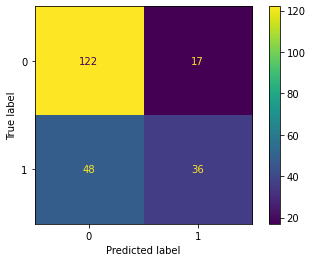

In [299]:
disp = plot_confusion_matrix(clf, X_test, y_test, cmap="viridis", values_format="d")  # Blues, default-sklearn=viridis
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_estimator

In [300]:
disp.confusion_matrix

array([[122,  17],
       [ 48,  36]], dtype=int64)

#### Using ConfusionMatrixDisplay

Ref: [ConfusionMatrixDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html)

In [301]:
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_true=y_test, y_pred=y_pred, labels=clf.classes_)
cm

array([[122,  17],
       [ 48,  36]], dtype=int64)

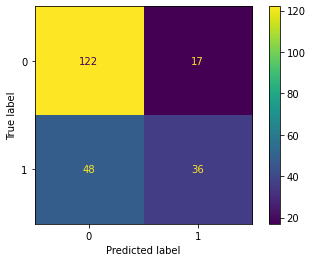

In [302]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                              display_labels=clf.classes_)
disp.plot()
plt.show()

## Compare multiple ROC (Receiver Operating Characteristic) curves in a single plot

New in scikit-learn 0.22: Easily [compare multiple ROC curves](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_roc_curve.html) in a single plot!

Automatically displays the [AUC](https://www.dataschool.io/roc-curves-and-auc-explained/) for each model as well.

Note: Beginning in scikit-learn 1.0, the plot_roc_curve function has been deprecated in favor of [two new methods](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html) in the RocCurveDisplay class.

In [303]:
file_input_path = "titanic_train.csv"
if not os.path.exists(file_input_path):
    df_train = pd.read_csv("http://bit.ly/kaggletrain")
    df_train.to_csv(file_input_path, header=True, index=False, sep="\t")
else:
    df_train = pd.read_csv(file_input_path, header=0, sep="\t")
    
features = ["Pclass", "Fare", "SibSp"]
X, y = df_train[features], df_train["Survived"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [304]:
X_train.head(2)

,Pclass,Fare,SibSp
105,3,7.8958,0
68,3,7.9250,4


In [305]:
y_train.head(2)

105    0
68     1
Name: Survived, dtype: int64

In [306]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [307]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()

In [308]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [309]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=None, splitter='best')

In [310]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=None, verbose=0, warm_start=False)

### Using plot_roc_curve --> be removed in 1.2

C:\Users\TienLE\anaconda3\envs\py39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\TienLE\anaconda3\envs\py39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\TienLE\anaconda3\envs\py39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or 

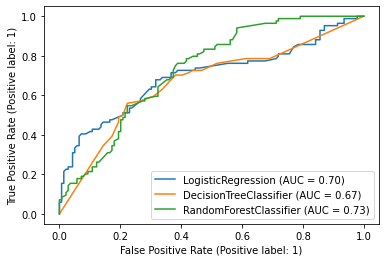

In [311]:
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(lr, X_test, y_test)
plot_roc_curve(dt, X_test, y_test, ax=disp.ax_);
plot_roc_curve(rf, X_test, y_test, ax=disp.ax_);
plt.show()

### Using RocCurveDisplay

Ref:
+ [RocCurveDisplay](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.RocCurveDisplay.html)
+ [roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve)

In [312]:
from sklearn.metrics import RocCurveDisplay, roc_curve, auc

In [313]:
y_pred_lr = lr.predict(X_test)
y_pred_dt = dt.predict(X_test)
y_pred_rf = rf.predict(X_test)

In [314]:
y_pred_lr[:10]

array([0, 0, 0, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

In [315]:
y_pred_dt[:10]

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 0], dtype=int64)

In [316]:
y_pred_rf[:10]

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 0], dtype=int64)

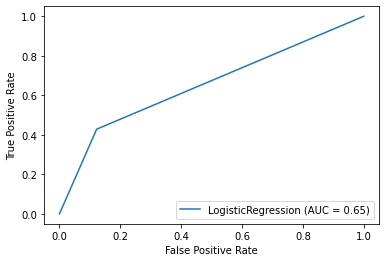

In [317]:
# LogisticRegression
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_true=y_test,y_score=y_pred_lr, pos_label=1)
# pos_labelint or str, default=None
#   The label of the positive class. When pos_label=None, if y_true is in {-1, 1} or {0, 1}, pos_label is set to 1, otherwise an error will be raised.

disp = RocCurveDisplay(fpr=fpr_lr, tpr=tpr_lr, roc_auc=auc(fpr_lr, tpr_lr), estimator_name="LogisticRegression")

disp.plot()
plt.show()

<Figure size 432x288 with 0 Axes>

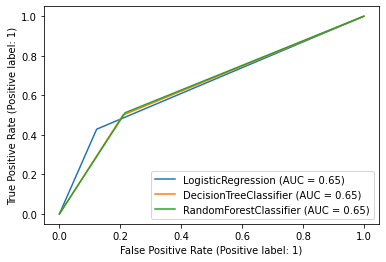

In [318]:
# Plot all ROC curves
plt.figure()

disp = RocCurveDisplay.from_predictions(y_true=y_test, y_pred=y_pred_lr, name="LogisticRegression");
RocCurveDisplay.from_predictions(y_true=y_test, y_pred=y_pred_dt, name="DecisionTreeClassifier", ax=disp.ax_)
RocCurveDisplay.from_predictions(y_true=y_test, y_pred=y_pred_rf, name="RandomForestClassifier", ax=disp.ax_)
plt.show()

## Using stratified sampling with train_test_split

Be sure to set "stratify=y" so that class proportions are preserved when splitting.

Especially important if you have class imbalance!

Ref: [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

In [319]:
df = pd.DataFrame({'feature':list(range(8)), 'target':['not fraud']*6 + ['fraud']*2})

In [320]:
df.head(3)

,feature,target
0,0,not fraud
1,1,not fraud
2,2,not fraud


In [321]:
df["target"].value_counts()

not fraud    6
fraud        2
Name: target, dtype: int64

In [322]:
X = df[['feature']]
y = df['target']

In [323]:
from sklearn.model_selection import train_test_split

### Not stratified

`y_train` contains **NONE** of the minority class, whereas `y_test` contains **ALL** of the minority class.

In [324]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [325]:
y_train

3    not fraud
0    not fraud
5    not fraud
4    not fraud
Name: target, dtype: object

In [326]:
y_test

6        fraud
2    not fraud
1    not fraud
7        fraud
Name: target, dtype: object

### Stratified

Class proportions are the **SAME** in `y_train` and `y_test`.

In [327]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0, stratify=y)

In [328]:
y_train

1    not fraud
7        fraud
2    not fraud
4    not fraud
Name: target, dtype: object

In [329]:
y_test

3    not fraud
6        fraud
0    not fraud
5    not fraud
Name: target, dtype: object

## Shuffle our dataset when applying cross_val_score

If you use [cross-validation](https://scikit-learn.org/stable/modules/cross_validation.html) and your samples are NOT in an arbitrary order, [shuffling](https://scikit-learn.org/stable/modules/cross_validation.html#a-note-on-shuffling) may be required to get meaningful results.

Use [KFold](https://scikit-learn.org/stable/modules/cross_validation.html#k-fold) or [StratifiedKFold](https://scikit-learn.org/stable/modules/cross_validation.html#stratified-k-fold) in order to shuffle!

### Using StratifiedKFold for classification problems

In [330]:
file_input_path = "titanic_train.csv"
if not os.path.exists(file_input_path):
    df_train = pd.read_csv("http://bit.ly/kaggletrain")
    df_train.to_csv(file_input_path, header=True, index=False, sep="\t")
else:
    df_train = pd.read_csv(file_input_path, header=0, sep="\t")
    
features = ["Pclass", "Fare", "SibSp"]
X, y = df_train[features], df_train["Survived"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [331]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(5, shuffle=True, random_state=1)

In [332]:
clf = LogisticRegression()

In [333]:
scores = cross_val_score(clf, X, y, cv=skf, scoring="accuracy")
scores

array([0.65363128, 0.7247191 , 0.66853933, 0.68539326, 0.65730337])

In [334]:
scores.mean()

0.6779172682191954

### Using KFold with regression problems

In [335]:
# Regression corpus
from sklearn.datasets import load_diabetes

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold

In [336]:
reg = LinearRegression()

In [337]:
X_reg, y_reg = load_diabetes(return_X_y=True)

In [338]:
X_reg[:3]

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034]])

In [339]:
y_reg[:3]

array([151.,  75., 141.])

In [340]:
kf = KFold(5, shuffle=True, random_state=1)

In [341]:
scores = cross_val_score(reg, X_reg, y_reg, cv=kf, scoring="r2")
scores

array([0.43843604, 0.38982527, 0.52792606, 0.47359858, 0.57449343])

In [342]:
scores.mean()

0.4808558770194292

## Use AUC to evaluate multi-class problems

[AUC](https://scikit-learn.org/stable/modules/model_evaluation.html#receiver-operating-characteristic-roc) is an excellent evaluation metric for binary classification, especially if you have class imbalance.

New in scikit-learn 0.22: AUC can be used with [multiclass problems](https://scikit-learn.org/stable/modules/model_evaluation.html#multi-class-case)! Supports "one-vs-one" and "one-vs-rest" strategies.

Additional links: [ROC curves and AUC explained (video)](https://www.dataschool.io/roc-curves-and-auc-explained/)

In [343]:
from sklearn.datasets import load_wine

In [344]:
X, y = load_wine(return_X_y=True)

In [345]:
X[:3]

array([[1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
        3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, 1.120e+01, 1.000e+02, 2.650e+00,
        2.760e+00, 2.600e-01, 1.280e+00, 4.380e+00, 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, 1.860e+01, 1.010e+02, 2.800e+00,
        3.240e+00, 3.000e-01, 2.810e+00, 5.680e+00, 1.030e+00, 3.170e+00,
        1.185e+03]])

In [346]:
y[:3]

array([0, 0, 0])

In [347]:
np.unique(y)

array([0, 1, 2])

In [348]:
clf = LogisticRegression()

In [349]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

In [350]:
clf.fit(X_train, y_train)

C:\Users\TienLE\anaconda3\envs\py39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [351]:
y_pred_proba = clf.predict_proba(X_test)

In [352]:
y_pred_proba[:3]

array([[1.52956883e-03, 8.33190734e-05, 9.98387112e-01],
       [3.52924736e-01, 6.45037036e-01, 2.03822723e-03],
       [2.91763667e-05, 9.99875495e-01, 9.53286356e-05]])

### Using 'ovo' (One-vs-One) or 'ovr' (One-vs-Rest)

In [353]:
from sklearn.metrics import roc_auc_score

In [354]:
roc_auc_score(y_test, y_pred_proba, multi_class="ovo")

0.9975308641975308

### Multiclass AUC with cross-validation

In [355]:
scores = cross_val_score(clf, X, y, cv=5, scoring="roc_auc_ovo")
scores

C:\Users\TienLE\anaconda3\envs\py39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\TienLE\anaconda3\envs\py39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

array([0.97678571, 0.9952381 , 0.99007937, 1.        , 1.        ])

In [356]:
scores.mean()

0.9924206349206349

### Estimating by F1-score

In [357]:
cross_val_score(clf, X, y, cv=5, scoring="f1_macro").mean()

C:\Users\TienLE\anaconda3\envs\py39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\TienLE\anaconda3\envs\py39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

0.9568115743905217